### Loading required libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import transform, io
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Importing the dataset

In [ ]:
import os
import cv2

path = 'Tumor/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor':2, 'meningioma_tumor':3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

- The dataset has three kinds of tumor images
- The cv2 library is imported to deal with image data
- Creating two lists, X and Y, and appending images and labels to them respectively

In [ ]:
df = pd.DataFrame({'image_id': list(range(len(X))),
                   'image': X,
                   'tumor_type': Y})

# Print the dataframe
df.head()

,image_id,image,tumor_type
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",0
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 3, 2, 3, 2,...",0
2,2,"[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...",0
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,4,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, ...",0


- Patient ages are not given for the dataset.
- Adding a new column with random values

In [ ]:
# Add a column "age" with random age values
df['age'] = np.random.randint(1, 100, size=2870)

In [ ]:
df.head()

,image_id,image,tumor_type,age
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",0,32
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 3, 2, 3, 2,...",0,15
2,2,"[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...",0,5
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,37
4,4,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, ...",0,42


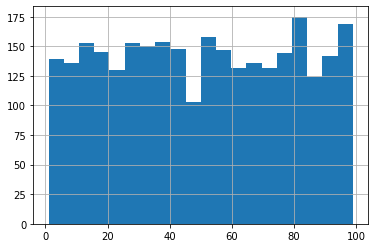

In [ ]:
# Distribution of Age variable
df['age'].hist(bins=20)
plt.show()

- The age variable is well spread

In [ ]:
# Converting the list to an array for further processing
X = np.array(X)
Y = np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

- The classes are imbalanced
- No tumor class has the least data, compared to the other three classes

In [ ]:
X_updated = X.reshape(len(X), -1)

- reshape the array X into a two-dimensional array with one dimension of length equal to the length of X and another dimension with as many elements as necessary to accommodate all the elements of X.
- The -1 argument in the second dimension tells NumPy to automatically calculate the number of elements in that dimension based on the size of the input array.

In [ ]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

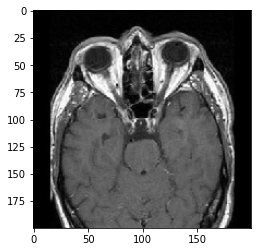

In [ ]:
# Visualizing an image from the dataset
plt.imshow(X[0], cmap='gray')

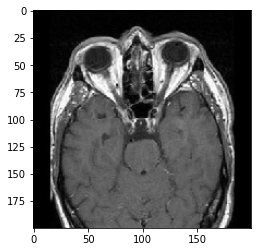

In [ ]:
# Select an image from the dataframe
image = df['image'][0]

# Plot the image
plt.imshow(image, cmap='gray')
plt.show()

### Data preprocessing:

In [ ]:
# Applying data augmentation to  increase the size of training dataset
def apply_augmentation(image):
    # Randomly rotate the image by a small angle (e.g., -15 to 15 degrees)
    angle = np.random.uniform(-15, 15)
    image = transform.rotate(image, angle)

    # Randomly flip the image horizontally
    if np.random.rand() > 0.5:
        image = np.fliplr(image)

    return image

# Apply data augmentation to your dataset
augmented_images = []
# Augmentation is not performed on flattened images because it would increase computational complexity
for img in X:
    augmented_img = apply_augmentation(img)
    augmented_images.append(augmented_img)

augmented_images = np.array(augmented_images)

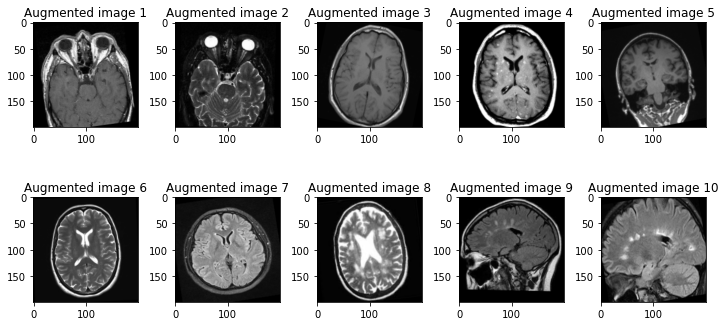

In [ ]:
# Visualiazing some augmented images
augmented_images = augmented_images[:10]

# Plot the images
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    axs[i // 5, i % 5].imshow(augmented_images[i], cmap='gray')
    axs[i // 5, i % 5].set_title('Augmented image {}'.format(i + 1))

plt.tight_layout()
plt.show()

In [ ]:
# Splitting the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=42,
                                               test_size=.20)

In [ ]:
# Dimension of the train and test datasets
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

- Extract relevant features from the MRI images. Visualize a few examples of these extracted features.

In [ ]:
# Normalizing the dataset
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.svm import SVC


In [ ]:
# Training the classifier
# Create an OvR classifier
ovr_clf = SVC(kernel='linear')

# Fit the classifier to the training data
ovr_clf.fit(xtrain, ytrain)
# cannot use augmented images since it was not flattened and SVM expects dimension <=2

SVC(kernel='linear')

In [ ]:
# Select two features (e.g., the first two features)
feature1_index = 0
feature2_index = 1

# Extract the selected features from the training data
xtrain_subset = xtrain[:, [feature1_index, feature2_index]]


In [ ]:
xtrain = xtrain.reshape(-1, 40000)
xtest = xtest.reshape(-1, 40000)

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8101045296167247


In [ ]:
testing_pred=sv.predict(xtest)
training_pred=sv.predict(xtrain)

### Model Evaluation

In [ ]:
# Training Metrics
training_accuracy = accuracy_score(ytrain, training_pred)
training_f1 = f1_score(ytrain, training_pred, average = 'weighted')
training_precision = precision_score(ytrain, training_pred, average = 'weighted')
training_recall = recall_score(ytrain, training_pred, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(ytest, testing_pred)
testing_f1 = f1_score(ytest, testing_pred, average = 'weighted')
testing_precision = precision_score(ytest, testing_pred, average = 'weighted')
testing_recall = recall_score(ytest, testing_pred, average = 'weighted')

print('Support Vector Machines')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Support Vector Machines


Training Model Performance Check
Accuracy Score : 1.0000
F1 Score : 1.0000
Precision Score : 1.0000
Recall Score : 1.0000


Testing Model Performance Check
Accuracy Score : 0.8101
F1 Score : 0.8060
Precision Score : 0.8056
Recall Score : 0.8101


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(ytest, testing_pred)

# Print the confusion matrix
print('Confusion Matrix')
print(cm)


Confusion Matrix
[[ 59   8   4   7]
 [  0 175   2   3]
 [  3   4 132  23]
 [ 16  12  27  99]]


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  1,   9,  19,  22,  24,  43,  58,  60,  68,  76,  77,  84,  86,
         93,  97, 106, 111, 114, 121, 124, 130, 135, 140, 146, 151, 154,
        183, 185, 188, 189, 192, 201, 203, 211, 214, 225, 226, 229, 240,
        248, 259, 261, 272, 277, 281, 291, 298, 299, 322, 332, 336, 340,
        349, 356, 361, 367, 371, 372, 373, 379, 380, 391, 394, 397, 409,
        429, 430, 435, 442, 445, 448, 452, 458, 470, 477, 478, 481, 483,
        484, 485, 495, 497, 502, 511, 512, 515, 517, 519, 521, 523, 528,
        530, 532, 533, 536, 537, 541, 545, 546, 547, 548, 554, 555, 556,
        558, 559, 564, 569, 572], dtype=int64),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[84],ytest[84])

Total Misclassified Samples:  109
3 1


In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor', 'glioma_tumor':2, 'meningioma_tumor':3}

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='Tumor/Testing'
for i in os.listdir(path)[:9]:
    img=cv2.imread(os.path.join(path,i),0)
    if img is not None:
        p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
        plt.subplot(3,3,c)
        plt.title(dec.get(p[0],'UnKnown'))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        c+=1
    else:
        print(f"Fail to load image:{i}")
        plt.show()

Fail to load image:glioma_tumor


<Figure size 864x576 with 0 Axes>

Fail to load image:meningioma_tumor
Fail to load image:no_tumor
Fail to load image:pituitary_tumor


In [ ]:
path = 'Tumor/Testing'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor':2, 'meningioma_tumor':3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])